# Comparison of Surveys

This notebook permit to observe the intersection between our survey and other surveys.

***

**Importing libraries:**

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Usefull funtions:**

In [2]:
def transpose_table(df):
    df = pd.DataFrame(df.values.T[1:], columns=df.id.tolist())
    return(df)

**Initialization:**

In [3]:
dfs = {}
list_names={}

**Dataframe and names list for the selected primary studies:**

In [4]:
df_selected = pd.DataFrame(pd.read_excel('selected_ids.xlsx'))
df_selected[['title']] = df_selected[['title']].applymap(lambda x: " ".join(re.findall("[A-Za-z]+",x)).lower() if isinstance(x, str) else x)

df_names = pd.DataFrame(pd.read_excel('names.xlsx'))
df_names = pd.DataFrame(df_names.values.T, columns=['name', 'long_name'])
df_names = df_names.applymap(lambda x: " ".join(re.findall("[A-Za-z]+",x)).lower() if isinstance(x, str) else x)

list_names['selected'] = df_names.stack().values.tolist()
dfs['selected'] = df_selected

**Other surveys:**

In [5]:
def load_and_prepare(file_name):
    df = pd.DataFrame(pd.read_excel(file_name))

    df[['title']] = df[['title']].applymap(lambda x: " ".join(re.findall("[A-Za-z]+",x)).lower() if isinstance(x, str) else x)
    df[['name']] = df[['name']].applymap(lambda x: " ".join(re.findall("[A-Za-z]+",x)).lower() if isinstance(x, str) else x)

    return(df)


list_surveys = ['jay2023', 'pijnacker2023', 'ergasheva2020', 'fahad2019', 'rieger2017', 'mobius2014', 'noureddine2013', 'bannour2021', 'garcia-martin2019a']
for key in list_surveys:
    dfs[key] = load_and_prepare(key+'.xlsx')
    list_names[key] = dfs[key]['name']

In [6]:
def check_if_in(key1, key2, dfs, list_names):
    # key1 cannot be selected
    cpt=0
    elems = []

    for i, row in dfs[key1].iterrows():
        is_in=False
        elem = ""
        if not dfs[key1].isna().loc[i, 'title']:
            if row.title in dfs[key2].title.values:
                is_in=True
                elem += str(row.fulltext_id) + ', ' + str(row.title) + ' - '
        if not dfs[key1].isna().loc[i, 'name']:
            if row['name'] in list_names[key2]:
                is_in=True
                elem += row['name'] + ' - '
        if is_in==True:
            cpt+=1
            elems.append(elem)

    return(cpt)

In [7]:
list_surveys = ['jay2023', 'pijnacker2023', 'ergasheva2020', 'fahad2019', 'rieger2017', 'mobius2014', 'noureddine2013', 'bannour2021', 'garcia-martin2019a']
list_surveys2 = list_surveys + ['selected']
labels_surveys = ["Jay '23", "Pijnacker '23", "Ergasheva '20", "Fahad '19", "Rieger '17", "Mobius '14", "Noureddine '13", "Bannour '21", "García-martín '19", "Our survey"]

col_new_names = dict(zip(list_surveys2, labels_surveys))

label_fig=""
cpt=0
for label in labels_surveys[:-1]:
    auth, year = label.split()
    labels_surveys[cpt] = auth + " et al. " + year
    label_fig += labels_surveys[cpt] + " \cite{" + list_surveys[cpt] + "}, "
    cpt+=1
label_fig = label_fig[:-2]+'.'
print(label_fig)    


similarity_matrix  = pd.DataFrame(index = list_surveys2, columns = list_surveys2)

for key1 in list_surveys:
    for key2 in list_surveys2:
        cpt = check_if_in(key1, key2, dfs, list_names)
        similarity_matrix.loc[key1, key2] = cpt

for key in list_surveys2:
    similarity_matrix.loc['selected', key] = similarity_matrix.loc[key, 'selected'] 

similarity_matrix.loc['selected', 'selected'] = df_selected.shape[0]

similarity_matrix.loc['ergasheva2020', 'ergasheva2020'] = 4

similarity_matrix

Jay et al. '23 \cite{jay2023}, Pijnacker et al. '23 \cite{pijnacker2023}, Ergasheva et al. '20 \cite{ergasheva2020}, Fahad et al. '19 \cite{fahad2019}, Rieger et al. '17 \cite{rieger2017}, Mobius et al. '14 \cite{mobius2014}, Noureddine et al. '13 \cite{noureddine2013}, Bannour et al. '21 \cite{bannour2021}, García-martín et al. '19 \cite{garcia-martin2019a}.


C:\Users\charlotte.rodriguez\AppData\Local\Temp\ipykernel_31280\2526172371.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if row.title in dfs[key2].title.values:


,jay2023,pijnacker2023,ergasheva2020,fahad2019,rieger2017,mobius2014,noureddine2013,bannour2021,garcia-martin2019a,selected
jay2023,20,0,0,6,0,2,0,4,1,7
pijnacker2023,0,21,0,0,0,0,2,0,0,3
ergasheva2020,0,0,4,0,0,0,0,0,0,0
fahad2019,6,0,0,26,0,5,0,0,6,1
rieger2017,0,0,0,0,11,0,1,0,1,1
mobius2014,2,0,0,5,0,30,0,0,2,0
noureddine2013,0,2,0,0,1,0,12,1,0,2
bannour2021,4,0,0,0,0,0,1,9,0,7
garcia-martin2019a,1,0,0,6,1,2,0,0,28,2
selected,7,3,0,1,1,0,2,7,2,108


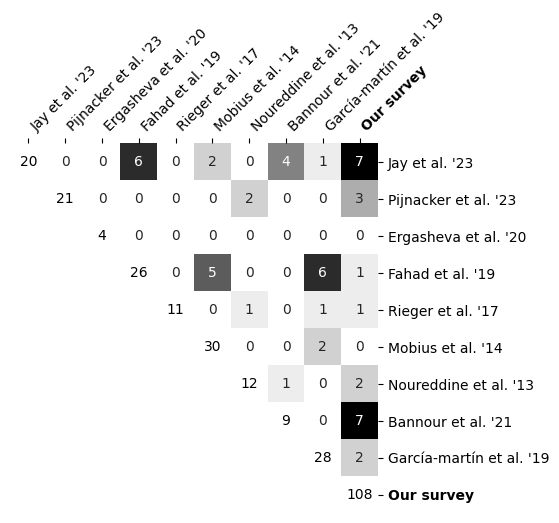

In [8]:
fig=plt.figure()

# Create a mask for the upper triangle excluding the diagonal
mask = np.tril(np.ones_like(similarity_matrix, dtype=bool))

# Create the heatmap with diagonal values ignored in color scaling but numbers displayed
ax = sns.heatmap(similarity_matrix.astype(int), annot=True, mask=mask, cmap='Greys', fmt='d', cbar=False)
# cbar_kws={'location': 'left'}

# Adjust the position of the heatmap
plt.subplots_adjust(left=0.325)  # Increase the left margin

# Manually annotate the diagonal
for i in range(len(similarity_matrix)):
    plt.text(i + 0.5, i + 0.5, similarity_matrix.iloc[i, i], ha='center', va='center')

# Rotate the tick labels for the x-axis to the top
ax.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')  # Rotate x-axis labels to diagonal


# Rotate the tick labels for the y-axis to the right
ax.yaxis.tick_right()
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

ax.set_xticklabels(labels_surveys)
ax.set_yticklabels(labels_surveys)

# Make the first x tick label bold
for label in ax.get_xticklabels():
    if label.get_text() == 'Our survey':
        label.set_weight('bold')
for label in ax.get_yticklabels():
    if label.get_text() == 'Our survey':
        label.set_weight('bold')

plt.savefig('heatmap.pdf', bbox_inches='tight') 

plt.show()